In [2]:
#data importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\air_project\global_air_pollution_dataset.csv")



In [2]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [4]:
df.columns


Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [5]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]

In [6]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [7]:
#seeing the missing rows of country
df[df["Country"].isnull()].head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good


In [8]:
#seeing city value which was missing
df[df["City"].isnull()].head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


In [9]:
#removing the city which is empty
df=df.dropna(subset=["City"])

In [10]:
#verifying if the city is removed or not
df[df["City"].isnull()].head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


In [11]:
#Predicting AQI using pollutant values
features=["PM2.5 AQI Value","CO AQI Value","Ozone AQI Value"]
target="AQI Value"
x=df[features]
y=df[target]

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
#predicting the y value (AQI)
y_pred=model.predict(x_test)

In [15]:
#evaluating the model
#if r2 score is close to 1,model is good! else, model is weak or needs tuning
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test,y_pred))


Mean Squared Error: 6.339672535928218
R^2 Score: 0.9980088261722115


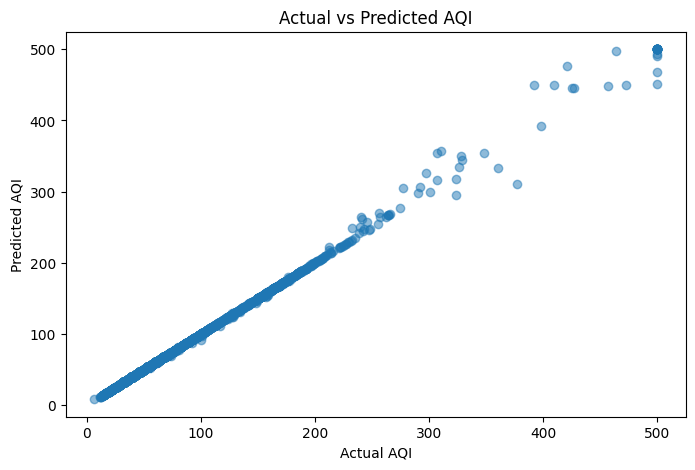

In [16]:
#Comparing predictions vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

In [17]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [18]:
import folium
m=folium.Map(location=[20.5937,78.9629],zoom_start=5)


In [19]:
for index,row in df.iterrows():
    try:
        aqi=row["AQI Value"]
        color=(
            "green" if aqi<=100 else
            "orange" if aqi<=200 else
            "red" if aqi<=300 else
            "purple"
        )
        folium.CircleMarker(
            location=[row['Latitude'],row['Longitude']],
            radius=6,
            popup=f"{row['City']}<br>AQI:{aqi}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)
    except:
        pass
        

In [20]:
m.save("aqi_map.html")

In [21]:
import os
os.getcwd()

'C:\\Users\\jites'

In [22]:
print(df.columns)

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')


In [23]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
city_coords = pd.read_csv(r"C:\air_project\geolocations-indian-cities.csv", encoding='latin1')


In [27]:
city_coords.columns

Index(['Geoname ID', 'Name', 'ASCII Name', 'Alternate Names', 'Latitude',
       'Longitude', 'Population', 'Digital Elevation Model', 'Country',
       'Coordinates'],
      dtype='object')

In [28]:
city_coords.rename(columns={
    'Name': 'City',             # Match with AQI data
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}, inplace=True)


In [30]:
#since some cities may have extra spaces or different casing, we normalise both of them in both datasets
df['City'] = df['City'].str.strip().str.lower()
city_coords['City'] = city_coords['City'].str.strip().str.lower()


In [33]:
df=pd.merge(df,city_coords[['City','Latitude','Longitude']],on="City",how="left")


In [45]:
df.to_csv("air_pollution_with_coords.csv", index=False)


In [46]:
print(df[['Latitude', 'Longitude']].isnull().sum())

# Optional: Drop rows with no coordinates
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)


Latitude     0
Longitude    0
dtype: int64


In [47]:
import folium

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

for _, row in df.iterrows():
    try:
        lat = row['Latitude']
        lon = row['Longitude']
        aqi = row['AQI Value']
        
        color = (
            'green' if aqi <= 50 else
            'yellow' if aqi <= 100 else
            'orange' if aqi <= 200 else
            'red' if aqi <= 300 else
            'purple' if aqi <= 400 else
            'maroon'
        )
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            popup=f"{row['City'].title()}<br>AQI: {aqi}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)
    except:
        continue

m.save("aqi_map.html")


In [48]:
import json

with open("C:/air_project/india_telengana.geojson", "r") as f:
    india_geo = json.load(f)

# Check sample state name
india_geo['features'][0]['properties']


{'ID_0': 105,
 'ISO': 'IND',
 'NAME_0': 'India',
 'ID_1': 1,
 'NAME_1': 'Andaman and Nicobar'}

In [43]:
pip install streamlit


   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ------------- -------------------------- 3.4/10.1 MB 22.3 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.1 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------------------- 731.2/731.2 kB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------  6.8/6.9 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 25.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   -- ------------------------------------- 1.8/25.7 MB 20.2 MB/s eta 0:00:02
   ---------- ----------------------------- 6.6/25.7 MB 15.5 MB/s eta 0:00:02
   ------------------- -------------------- 12.6/25.7 MB 19.7 MB/s eta 0:00:01
   -------------

In [50]:
import os
os.chd()

AttributeError: module 'os' has no attribute 'chd'